In [1]:
import wandb
import pandas as pd

wandb.login()

wandb: Currently logged in as: jack-j-desmarais (jjd_academic) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [2]:
api = wandb.Api()

runs = api.runs(path='jjd_academic/sparse_autoencoders',
         filters={"config.cfg.exp_name": 'v12_topk_sweep'})
dfs = {}
for run in runs:
    # print(run.config)
    val_class_metrics = run.history(samples=1000, keys=['epoch', '_runtime','val_num_dead_features','val_loss','val_l1_loss','val_l2_loss','val_l0_norm','val_l1_norm','val_aux_loss'])
    train_metrics = run.history(samples=1000, keys=['epoch','train_num_dead_features','train_loss','train_l1_loss','train_l2_loss','train_l0_norm','train_l1_norm','train_aux_loss'])
    # print(f'{val_class_metrics=}')
    # print(f'{train_metrics=}')
    if (not val_class_metrics.empty) and (not train_metrics.empty):
        val_class_metrics.loc[0,'epoch'] = -1
        metrics = pd.merge(left=val_class_metrics.drop(columns='_step'), right=train_metrics.drop(columns='_step'), on='epoch', how='outer')

        dfs[(run.config['cfg']['dict_size'],run.config['cfg']['top_k'], run.config['cfg']['top_k_aux'], run.config['cfg']['aux_penalty'],run.config['cfg']['num_workers'])] = metrics
metrics = pd.concat(dfs)
metrics.columns.name = 'Metrics'
metrics.index.names = ['dict_size','topk','topk_aux','aux_penalty','num_workers','epoch']

metrics

Metrics                                                epoch     _runtime  \
dict_size topk topk_aux aux_penalty num_workers epoch                       
256       4    16       1.00        64          0         -1   103.680183   
                                                1          0   529.954162   
                                                2          1   917.558239   
                                                3          2  1304.743047   
                                                4          3  1685.175478   
...                                                      ...          ...   
          24   32       0.50        64          3          2   897.341129   
                        0.10        64          0         -1    86.001755   
                                                1          0   513.579954   
                        0.01        64          0         -1    78.176377   
                                                1          0   512.981925   

Metrics                                                val_num_dead_features  \
dict_size topk topk_aux aux_penalty num_workers epoch                          
256       4    16       1.00        64          0                  59.166401   
                                                1                   3.244967   
                                                2                   0.412403   
                                                3                   0.873691   
                                                4                   0.149368   
...                                                                      ...   
          24   32       0.50        64          3                  23.234629   
                        0.10        64          0                   2.900620   
                                                1                   0.714756   
                        0.01        64          0                   2.900620   
                                                1                   1.184727   

Metrics                                                  val_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch               
256       4    16       1.00        64          0      445.738037   
                                                1      116.610741   
                                                2       61.852077   
                                                3       67.987793   
                                                4       43.968338   
...                                                           ...   
          24   32       0.50        64          3        1.225084   
                        0.10        64          0      253.851349   
                                                1       10.133547   
                        0.01        64          0      233.653687   
                                                1        9.477218   

Metrics                                                val_l1_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch                
256       4    16       1.00        64          0                0   
                                                1                0   
                                                2                0   
                                                3                0   
                                                4                0   
...                                                            ...   
          24   32       0.50        64          3                0   
                        0.10        64          0                0   
                                                1                0   
                        0.01        64          0                0   
                                                1                0   

Metrics                                                val_l2_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch                
256     

In [3]:
metrics.to_csv('./v12_topk_sweep-Training_traces.csv')

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_context('notebook')
sns.set_palette('colorblind')

metrics = pd.read_csv('./v12_topk_sweep-Training_traces.csv',index_col=[0,1,2,3,4,5,6,7], header=0)
metrics.columns.name = 'Metrics'
display(metrics)

Metrics                                                                    val_num_dead_features  \
dict_size topk topk_aux aux_penalty num_workers epoch epoch.1 _runtime                             
256       4    16       1.00        64          0     -1      103.680183               59.166401   
                                                1      0      529.954162                3.244967   
                                                2      1      917.558239                0.412403   
                                                3      2      1304.743047               0.873691   
                                                4      3      1685.175478               0.149368   
...                                                                                          ...   
          24   32       0.50        64          3      2      897.341129               23.234629   
                        0.10        64          0     -1      86.001755                 2.900620   
                                                1      0      513.579954                0.714756   
                        0.01        64          0     -1      78.176377                 2.900620   
                                                1      0      512.981925                1.184727   

Metrics                                                                      val_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch epoch.1 _runtime                  
256       4    16       1.00        64          0     -1      103.680183   445.738037   
                                                1      0      529.954162   116.610741   
                                                2      1      917.558239    61.852077   
                                                3      2      1304.743047   67.987793   
                                                4      3      1685.175478   43.968338   
...                                                                               ...   
          24   32       0.50        64          3      2      897.341129     1.225084   
                        0.10        64          0     -1      86.001755    253.851349   
                                                1      0      513.579954    10.133547   
                        0.01        64          0     -1      78.176377    233.653687   
                                                1      0      512.981925     9.477218   

Metrics                                                                    val_l1_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch epoch.1 _runtime                   
256       4    16       1.00        64          0     -1      103.680183             0   
                                                1      0      529.954162             0   
                                                2      1      917.558239             0   
                                                3      2      1304.743047            0   
                                                4      3      1685.175478            0   
...                                                                                ...   
          24   32       0.50        64          3      2      897.341129             0   
                        0.10        64          0     -1      86.001755              0   
                                                1      0      513.579954             0   
                        0.01        64          0     -1      78.176377              0   
                                                1      0      512.981925             0   

Metrics                                                                    val_l2_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch epoch.1 _runtime                   
256       4    16       1.00        64          0     -1      103.680183    227.327057   
                                                1      0      529.954162     59.672756   
          

In [5]:
to_plot = metrics.reset_index()
to_plot.columns = [col.replace('_', ' ').strip() for col in to_plot.columns]
to_plot['val live features'] = to_plot['dict size'] - to_plot['val num dead features']
to_plot['train live features'] = to_plot['dict size'] - to_plot['train num dead features']
to_plot['running epoch time (sec)'] = to_plot['runtime']/to_plot['epoch']
to_plot['running epoch time (min)'] = to_plot['running epoch time (sec)']/60
display(to_plot)

,dict size,topk,topk aux,aux penalty,num workers,epoch,epoch.1,runtime,val num dead features,val loss,...,train loss,train l1 loss,train l2 loss,train l0 norm,train l1 norm,train aux loss,val live features,train live features,running epoch time (sec),running epoch time (min)
0,256,4,16,1.00,64,0,-1,103.680183,59.166401,445.738037,...,NaN,NaN,NaN,NaN,NaN,NaN,196.833599,NaN,inf,inf
1,256,4,16,1.00,64,1,0,529.954162,3.244967,116.610741,...,195.932709,0.0,109.464531,3.999986,140.579880,86.468361,252.755033,203.853645,529.954162,8.832569
2,256,4,16,1.00,64,2,1,917.558239,0.412403,61.852077,...,55.265102,0.0,49.291763,3.999986,173.047913,5.973357,255.587597,255.882352,458.779120,7.646319
3,256,4,16,1.00,64,3,2,1304.743047,0.873691,67.987793,...,57.413673,0.0,41.119061,3.999986,176.666504,16.294611,255.126309,255.701695,434.914349,7.248572
4,256,4,16,1.00,64,4,3,1685.175478,0.149368,43.968338,...,59.149738,0.0,38.600159,3.999986,165.060822,20.549603,255.850632,255.458428,421.293870,7.021564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,256,24,32,0.50,64,3,2,897.341129,23.234629,1.225084,...,1.912339,0.0,1.408113,24.000107,338.902191,0.504226,232.765371,250.472122,299.113710,4.985228
3328,256,24,32,0.10,64,0,-1,86.001755,2.900620,253.851349,...,NaN,NaN,NaN,NaN,NaN,NaN,253.099380,NaN,inf,inf
3329,256,24,32,0.10,64,1,0,513.579954,0.714756,10.133547,...,31.311752,0.0,29.736982,24.000107,331.869080,1.574776,255.285244,255.508662,513.579954,8.559666
3330,256,24,32,0.01,64,0,-1,78.176377,2.900620,233.653687,...,NaN,NaN,NaN,NaN,NaN,NaN,253.099380,NaN,inf,inf


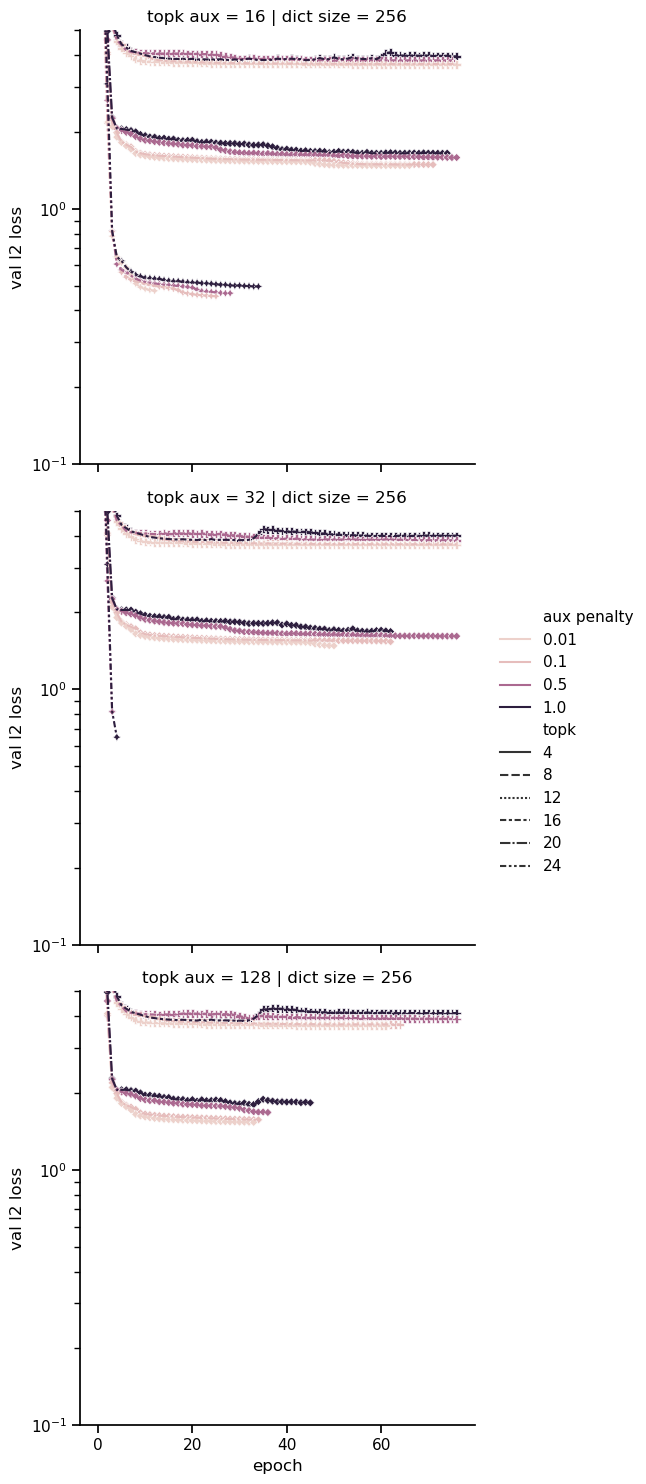

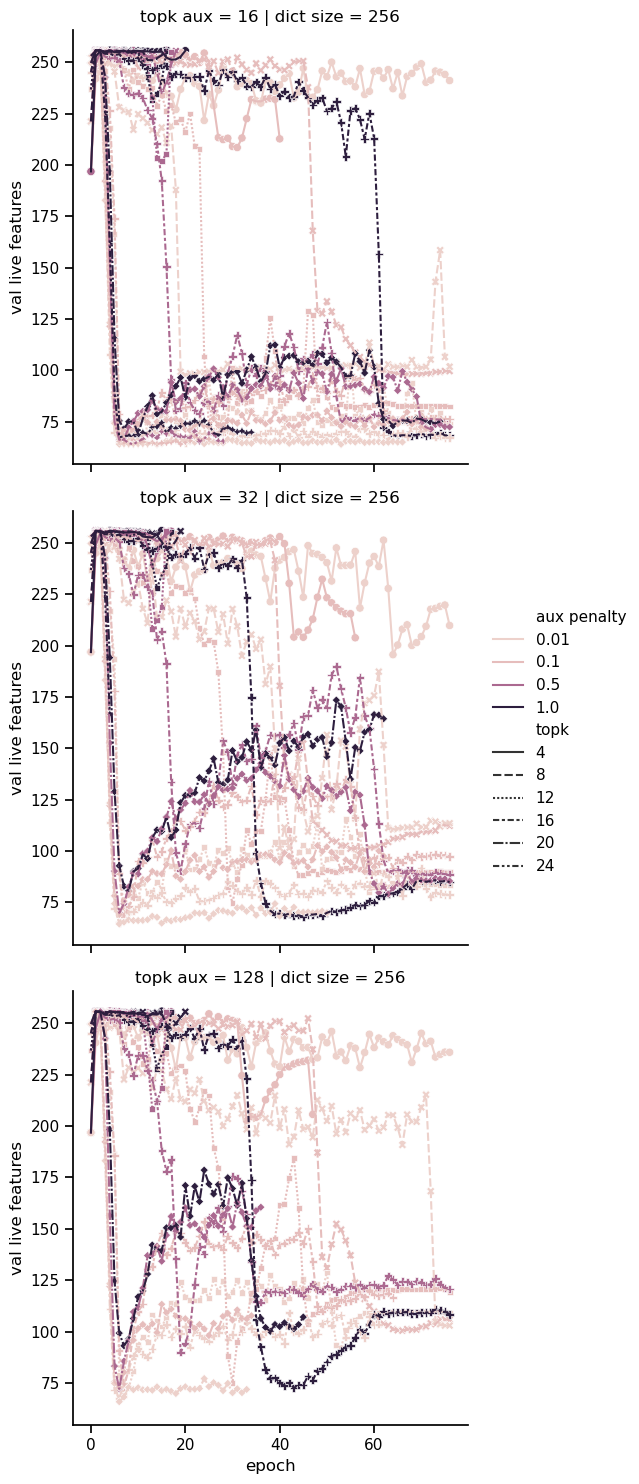

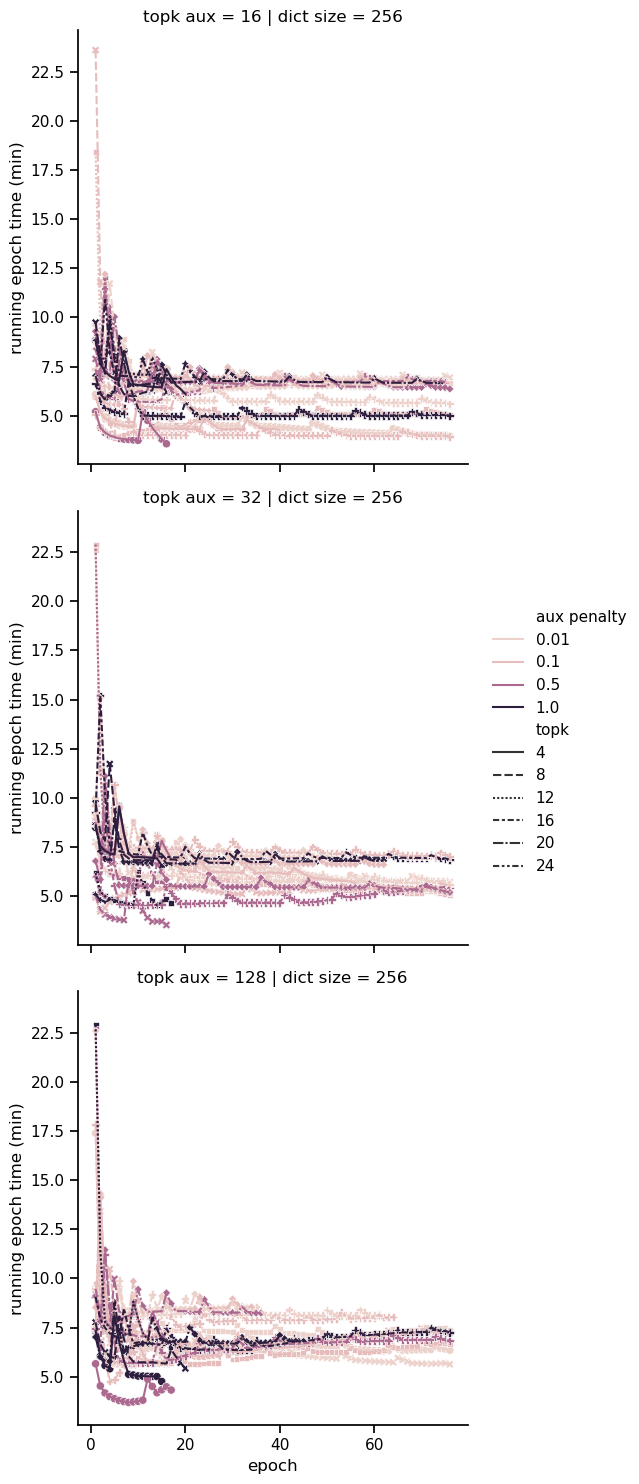

In [6]:
test_cols = ['val l2 loss','val live features', 'running epoch time (min)']
to_plot['num workers'] = pd.Categorical(to_plot['num workers'])


for col in test_cols:
    g= sns.relplot(data=to_plot, kind='line',
                x= 'epoch', y=col, 
                hue='aux penalty',
                style='topk',
                col='dict size',
                row='topk aux')
    
    g.map_dataframe(sns.scatterplot, x= 'epoch', y=col, 
                style='topk', hue='aux penalty')
    # g.refline(x=20, color='k', linestyle='--', alpha=0.5)
    # g.refline(x=39, color='k', linestyle='--', alpha=0.5)
    if col == 'val l2 loss':
        plt.ylim(0.1,5)
        plt.yscale('log')
        
    
    # g.refline(y=spliceAI_mets.loc['2024_12_14_SpliceAI_10k_Cryptic_test_metirics_no_topK_untrained_alphas_nologits.pckl',col[4:]], 
    #             c='k', alpha=0.5, linestyle='--', label='SpliceAI 10kb ensemble')
    # g.refline(y=spliceAI_mets.loc['2024_12_14_SpliceAI_400_Cryptic_test_metirics_no_topK_untrained_alphas_nologits.pckl',col[4:]], 
    #             c='k', alpha=0.6, linestyle='-.', label='SpliceAI 400bp ensemble')
    plt.show()

In [7]:
bar = to_plot.loc[to_plot.groupby(['topk aux','topk','dict size', 'aux penalty'], observed=True)['val loss'].idxmin()]
bar

,dict size,topk,topk aux,aux penalty,num workers,epoch,epoch.1,runtime,val num dead features,val loss,...,train loss,train l1 loss,train l2 loss,train l0 norm,train l1 norm,train aux loss,val live features,train live features,running epoch time (sec),running epoch time (min)
138,256,4,16,0.01,64,76,75,18033.041178,14.907246,28.586018,...,NaN,NaN,NaN,NaN,NaN,NaN,241.092754,NaN,237.276858,3.954614
61,256,4,16,0.10,64,40,39,10189.818456,43.271069,30.868519,...,NaN,NaN,NaN,NaN,NaN,NaN,212.728931,NaN,254.745461,4.245758
178,256,4,16,0.50,64,5,4,1173.566414,0.174507,33.913834,...,38.968708,0.0,32.386707,3.999986,146.050125,6.581975,255.825493,255.692837,234.713283,3.911888
9,256,4,16,1.00,64,9,8,3566.559716,0.369757,40.422569,...,40.784531,0.0,29.260517,3.999986,147.152756,11.523993,255.630243,255.699036,396.284413,6.604740
687,256,8,16,0.01,64,71,70,29115.590082,154.178391,15.162280,...,15.136555,0.0,15.035454,7.999972,192.852997,0.101101,101.821609,104.104889,410.078734,6.834646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2314,256,16,128,1.00,64,76,75,33083.086556,147.659988,6.640399,...,NaN,NaN,NaN,NaN,NaN,NaN,108.340012,NaN,435.303770,7.255063
3215,256,20,128,0.01,64,33,32,16779.430360,184.160614,1.549906,...,1.546712,0.0,1.532154,20.000029,276.966064,0.014558,71.839386,73.665924,508.467587,8.474460
3181,256,20,128,0.10,64,34,33,17437.273183,148.280487,1.716623,...,1.713276,0.0,1.567064,20.000029,279.200134,0.146212,107.719513,110.197403,512.860976,8.547683
3144,256,20,128,0.50,64,34,33,16824.005901,105.303459,2.438221,...,2.433393,0.0,1.684680,20.000029,282.897980,0.748713,150.696541,153.707993,494.823703,8.247062


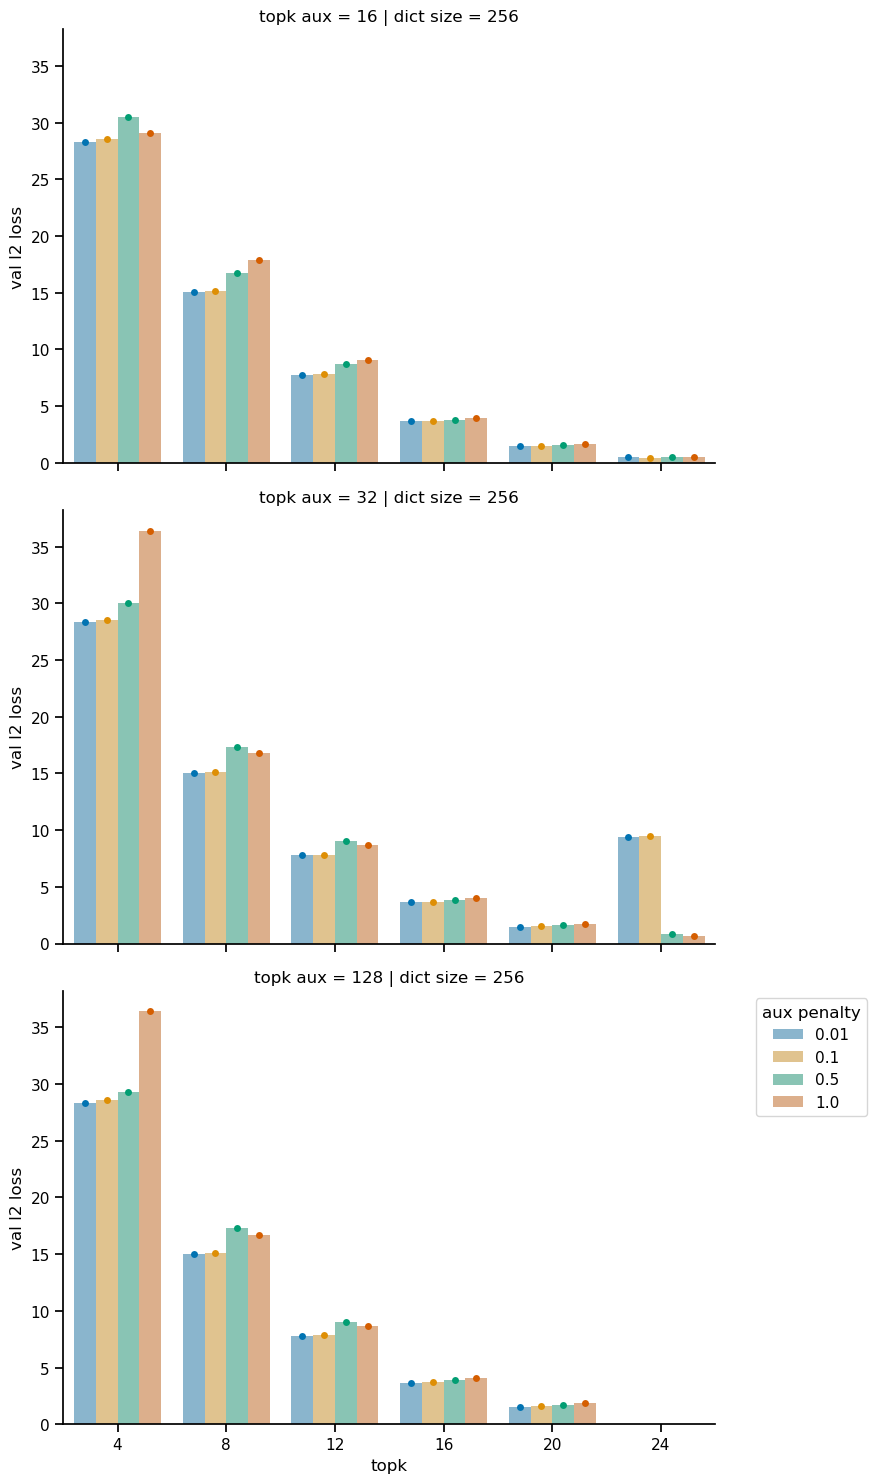

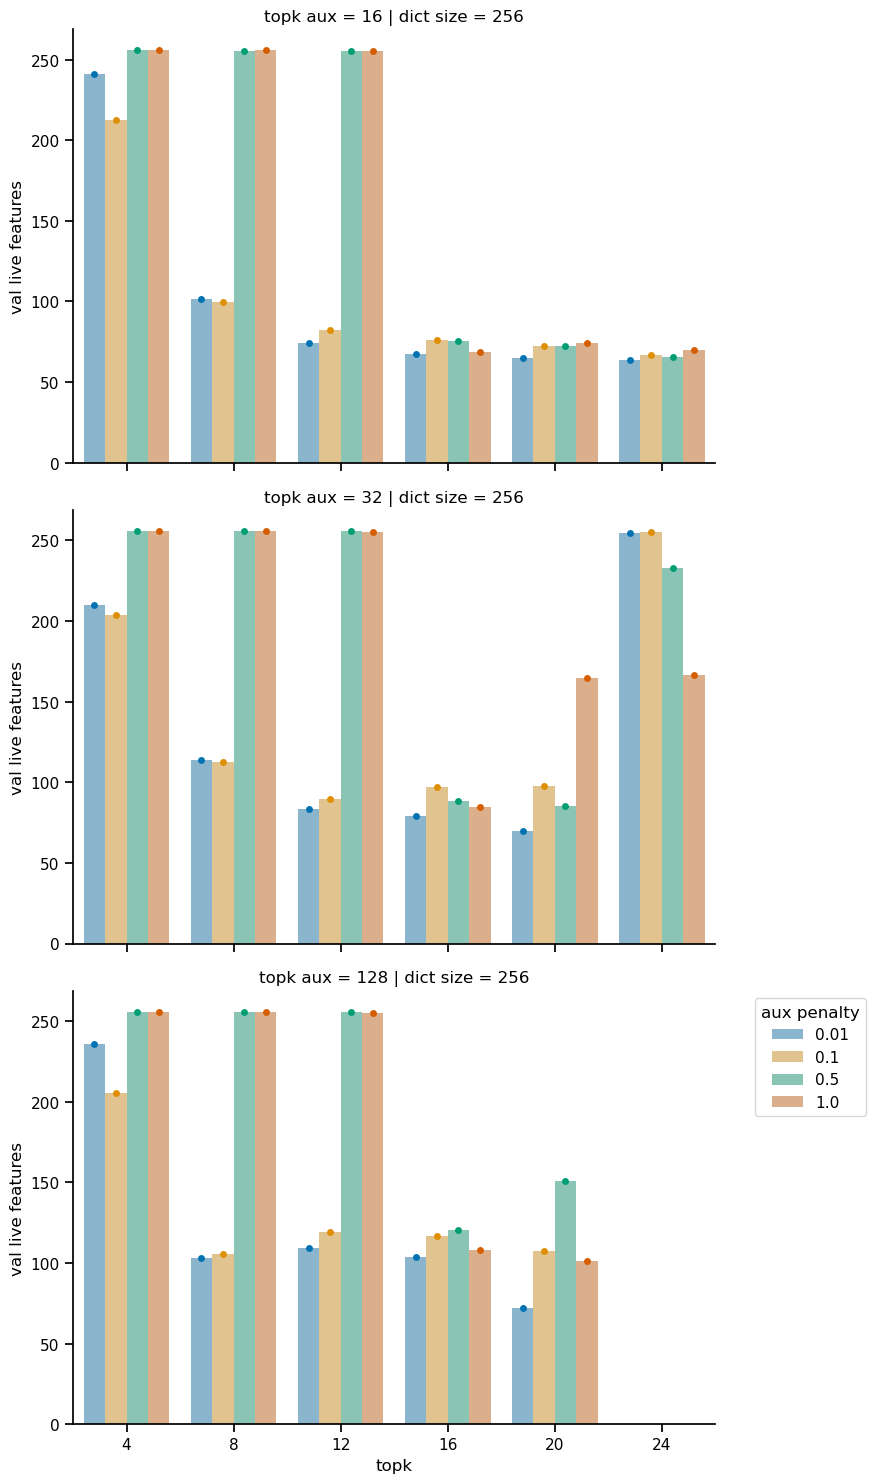

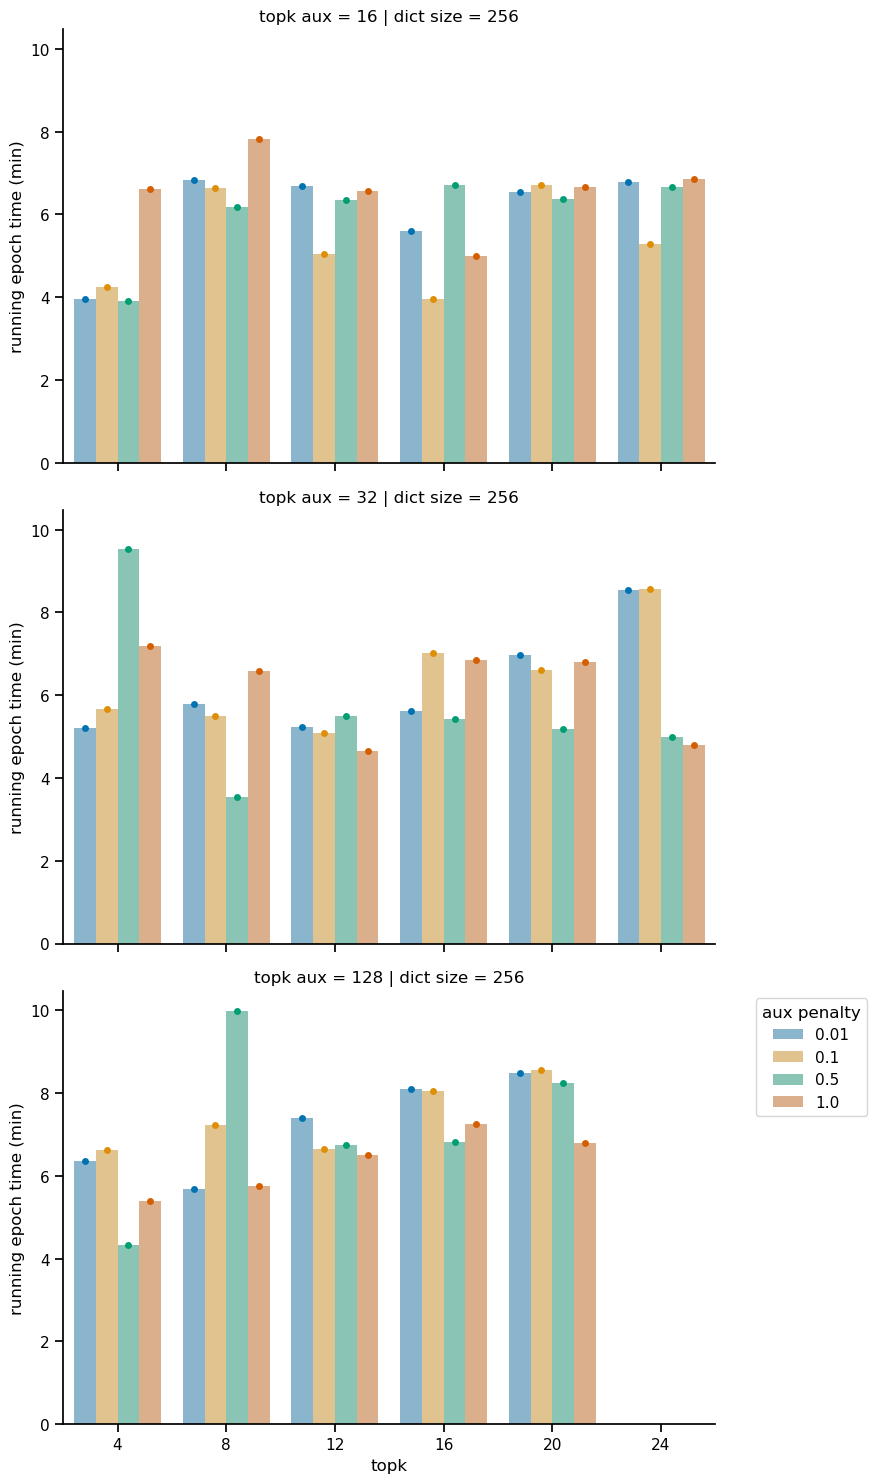

In [8]:
bar_plot = bar.copy()
# bar_plot['topk aux'] = 2 ** np.round(np.log2(bar_plot['topk aux']))

bar_plot['aux penalty'] = bar_plot['aux penalty'].astype(str)
hue_order = ['0.01', '0.1', '0.5', '1.0']
palette = ['C0','C1','C2','C3']
for col in test_cols:
    g = sns.catplot(data=bar_plot, kind='bar',
                    y=col, alpha=0.5,
                    hue='aux penalty',
                    x='topk',
                    col='dict size',
                    row='topk aux',
                    hue_order=hue_order,
                    palette=palette,
                    aspect=1.5, 
                    # col_wrap=3, 
                    legend=True)
    g.legend.remove()
    g.map_dataframe(sns.swarmplot, y=col, 
                    hue='aux penalty',
                    x='topk',
                    hue_order=hue_order,
                    palette=palette,
                    dodge=True,
                    legend=False)
    
    plt.legend(title='aux penalty', bbox_to_anchor=(1.05, 1), loc='upper left')


In [9]:
api = wandb.Api()

runs = api.runs(path='jjd_academic/sparse_autoencoders',
         filters={"config.cfg.exp_name": 'v12_topk_sweep'})
dfs = {}
for run in runs:
    # print(run)
    # print(run.config)
    test_class_metrics = run.history(samples=1000, keys=['test_num_dead_features','test_loss','test_l1_loss','test_l2_loss','test_l0_norm','test_l1_norm','test_aux_loss'])
    # print(f'{test_class_metrics=}')
    # print(f'{train_metrics=}')
    if (not test_class_metrics.empty):
        metrics = test_class_metrics.drop(columns='_step')

        dfs[(run.config['cfg']['dict_size'],run.config['cfg']['top_k'], run.config['cfg']['top_k_aux'], run.config['cfg']['aux_penalty'])] = metrics

metrics = pd.concat(dfs)
metrics.columns.name = 'Metrics'
metrics.index.names = ['dict_size','topk','topk_aux','aux_penalty','epoch']

metrics

Metrics                                    test_num_dead_features  test_loss  \
dict_size topk topk_aux aux_penalty epoch                                      
256       4    16       1.00        0                    0.612903  46.043633   
                        0.10        0                   48.129028  30.929604   
                        0.01        0                   16.064516  28.676435   
               32       1.00        0                    0.258065  42.368786   
                        0.50        0                    0.548387  40.262295   
               16       0.50        0                    0.354839  36.548183   
               32       0.10        0                   57.354832  30.840193   
                        0.01        0                   48.516132  28.631048   
               128      1.00        0                    0.387097  47.041306   
                        0.50        0                    0.322581  37.396683   
                        0.10        0                   52.322578  30.856474   
                        0.01        0                   21.645161  28.655636   
          8    16       1.00        0                    0.354839  25.407719   
                        0.50        0                    0.580645  21.684231   
                        0.10        0                  156.677429  16.145218   
               32       1.00        0                    0.741935  26.052546   
               16       0.01        0                  155.129013  15.204945   
               32       0.50        0                    0.580645  23.575104   
                        0.10        0                  146.419373  16.081095   
                        0.01        0                  141.967728  15.174965   
               128      1.00        0                    0.483871  25.445173   
                        0.50        0                    0.612903  24.120350   
                        0.10        0                  151.548370  16.005407   
                        0.01        0                  152.967728  15.175258   
          12   16       1.00        0                    0.677419  15.313096   
                        0.50        0                    1.129032  12.371078   
                        0.10        0                  176.096786   8.442674   
                        0.01        0                  182.193527   7.858731   
               32       1.00        0                    1.322581  16.014896   
                        0.50        0                    0.612903  12.127673   
                        0.10        0                  167.741913   8.427224   
               128      1.00        0                    1.322581  16.014896   
               32       0.01        0                  172.161270   7.866574   
               128      0.50        0                    0.612903  12.127673   
                        0.01        0                  150.516129   7.865469   
                        0.10        0                  139.741943   8.401224   
          16   16       1.00        0                  188.870972   6.841297   
                        0.50        0                  182.290314   5.350721   
                        0.10        0                  181.000031   4.022519   
                        0.01        0                  188.903259   3.716778   
               32       1.00        0                  174.645142   6.697004   
                        0.50        0                  173.774200   5.179161   
                        0.10        0                  162.483856   4.001826   
                        0.01        0                  181.838760   3.714214   
               128      1.00        0                  148.806458   6.653996   
                        0.50        0                  142.032257   5.293927   
          20   16       0.50        0                  185.516098   2.286317   
               32       0.50        0                  174.967773   2.276597   


In [10]:
metrics.to_csv('./v12_topk_sweep-test_results.csv')

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_context('notebook')
sns.set_palette('colorblind')

metrics = pd.read_csv('./v12_topk_sweep-test_results.csv',index_col=[0,1,2,3,4], header=0)
metrics.columns.name = 'Metrics'
display(metrics)

Metrics                                    test_num_dead_features  test_loss  \
dict_size topk topk_aux aux_penalty epoch                                      
256       4    16       1.00        0                    0.612903  46.043633   
                        0.10        0                   48.129028  30.929604   
                        0.01        0                   16.064516  28.676435   
               32       1.00        0                    0.258065  42.368786   
                        0.50        0                    0.548387  40.262295   
               16       0.50        0                    0.354839  36.548183   
               32       0.10        0                   57.354832  30.840193   
                        0.01        0                   48.516132  28.631048   
               128      1.00        0                    0.387097  47.041306   
                        0.50        0                    0.322581  37.396683   
                        0.10        0                   52.322578  30.856474   
                        0.01        0                   21.645161  28.655636   
          8    16       1.00        0                    0.354839  25.407719   
                        0.50        0                    0.580645  21.684231   
                        0.10        0                  156.677429  16.145218   
               32       1.00        0                    0.741935  26.052546   
               16       0.01        0                  155.129013  15.204945   
               32       0.50        0                    0.580645  23.575104   
                        0.10        0                  146.419373  16.081095   
                        0.01        0                  141.967728  15.174965   
               128      1.00        0                    0.483871  25.445173   
                        0.50        0                    0.612903  24.120350   
                        0.10        0                  151.548370  16.005407   
                        0.01        0                  152.967728  15.175258   
          12   16       1.00        0                    0.677419  15.313096   
                        0.50        0                    1.129032  12.371078   
                        0.10        0                  176.096786   8.442674   
                        0.01        0                  182.193527   7.858731   
               32       1.00        0                    1.322581  16.014896   
                        0.50        0                    0.612903  12.127673   
                        0.10        0                  167.741913   8.427224   
               128      1.00        0                    1.322581  16.014896   
               32       0.01        0                  172.161270   7.866574   
               128      0.50        0                    0.612903  12.127673   
                        0.01        0                  150.516129   7.865469   
                        0.10        0                  139.741943   8.401224   
          16   16       1.00        0                  188.870972   6.841297   
                        0.50        0                  182.290314   5.350721   
                        0.10        0                  181.000031   4.022519   
                        0.01        0                  188.903259   3.716778   
               32       1.00        0                  174.645142   6.697004   
                        0.50        0                  173.774200   5.179161   
                        0.10        0                  162.483856   4.001826   
                        0.01        0                  181.838760   3.714214   
               128      1.00        0                  148.806458   6.653996   
                        0.50        0                  142.032257   5.293927   
          20   16       0.50        0                  185.516098   2.286317   
               32       0.50        0                  174.967773   2.276597   


In [12]:
test_plot = metrics.reset_index()
test_plot.columns = [col.replace('_', ' ') for col in test_plot.columns]
test_plot['test live features'] = test_plot['dict size'] - test_plot['test num dead features']
display(test_plot)

,dict size,topk,topk aux,aux penalty,epoch,test num dead features,test loss,test l1 loss,test l2 loss,test l0 norm,test l1 norm,test aux loss,test live features
0,256,4,16,1.00,0,0.612903,46.043633,0,29.200821,4,147.692276,16.842815,255.387097
1,256,4,16,0.10,0,48.129028,30.929604,0,28.682047,4,147.891876,2.247554,207.870972
2,256,4,16,0.01,0,16.064516,28.676435,0,28.422119,4,147.949127,0.254316,239.935484
3,256,4,32,1.00,0,0.258065,42.368786,0,36.510029,4,158.259918,5.858760,255.741935
4,256,4,32,0.50,0,0.548387,40.262295,0,30.115402,4,146.335846,10.146892,255.451613
5,256,4,16,0.50,0,0.354839,36.548183,0,30.630489,4,146.146912,5.917687,255.645161
6,256,4,32,0.10,0,57.354832,30.840193,0,28.615833,4,148.143967,2.224362,198.645168
7,256,4,32,0.01,0,48.516132,28.631048,0,28.412672,4,148.019852,0.218379,207.483868
8,256,4,128,1.00,0,0.387097,47.041306,0,36.514008,4,157.465027,10.527287,255.612903
9,256,4,128,0.50,0,0.322581,37.396683,0,29.413073,4,147.922791,7.983605,255.677419


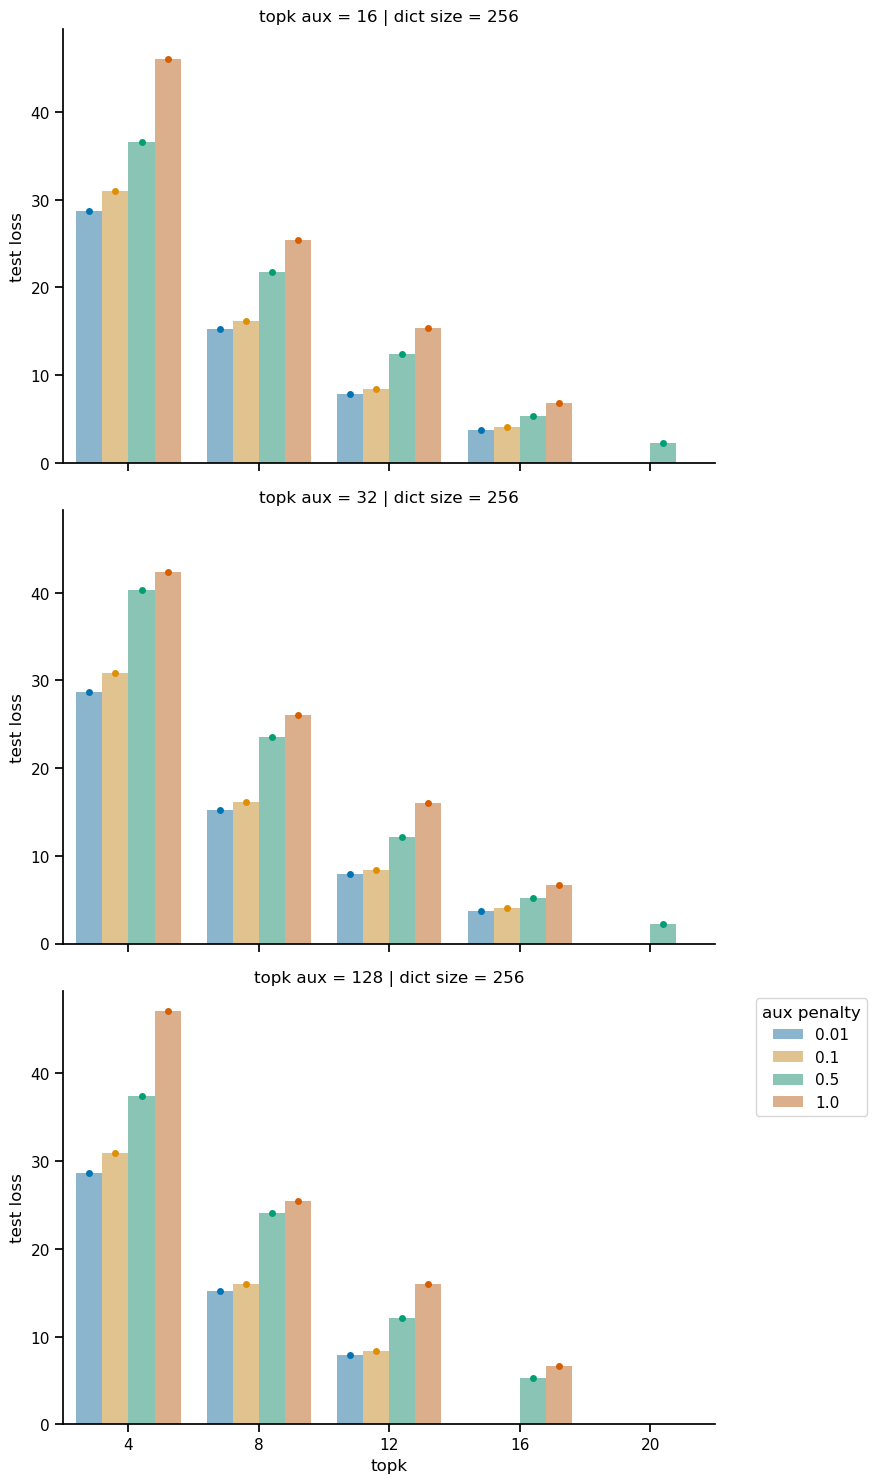

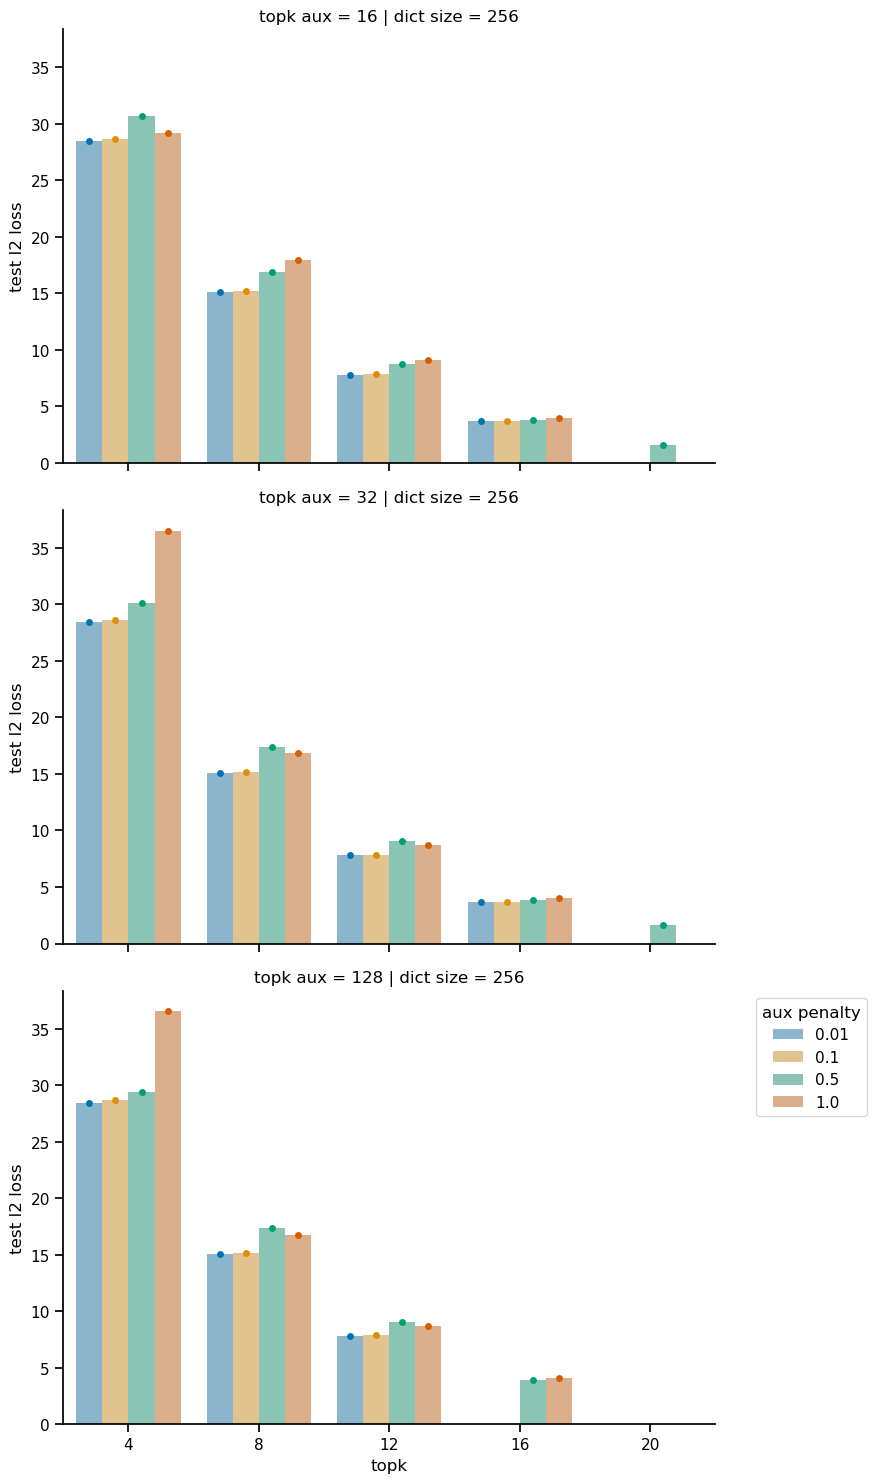

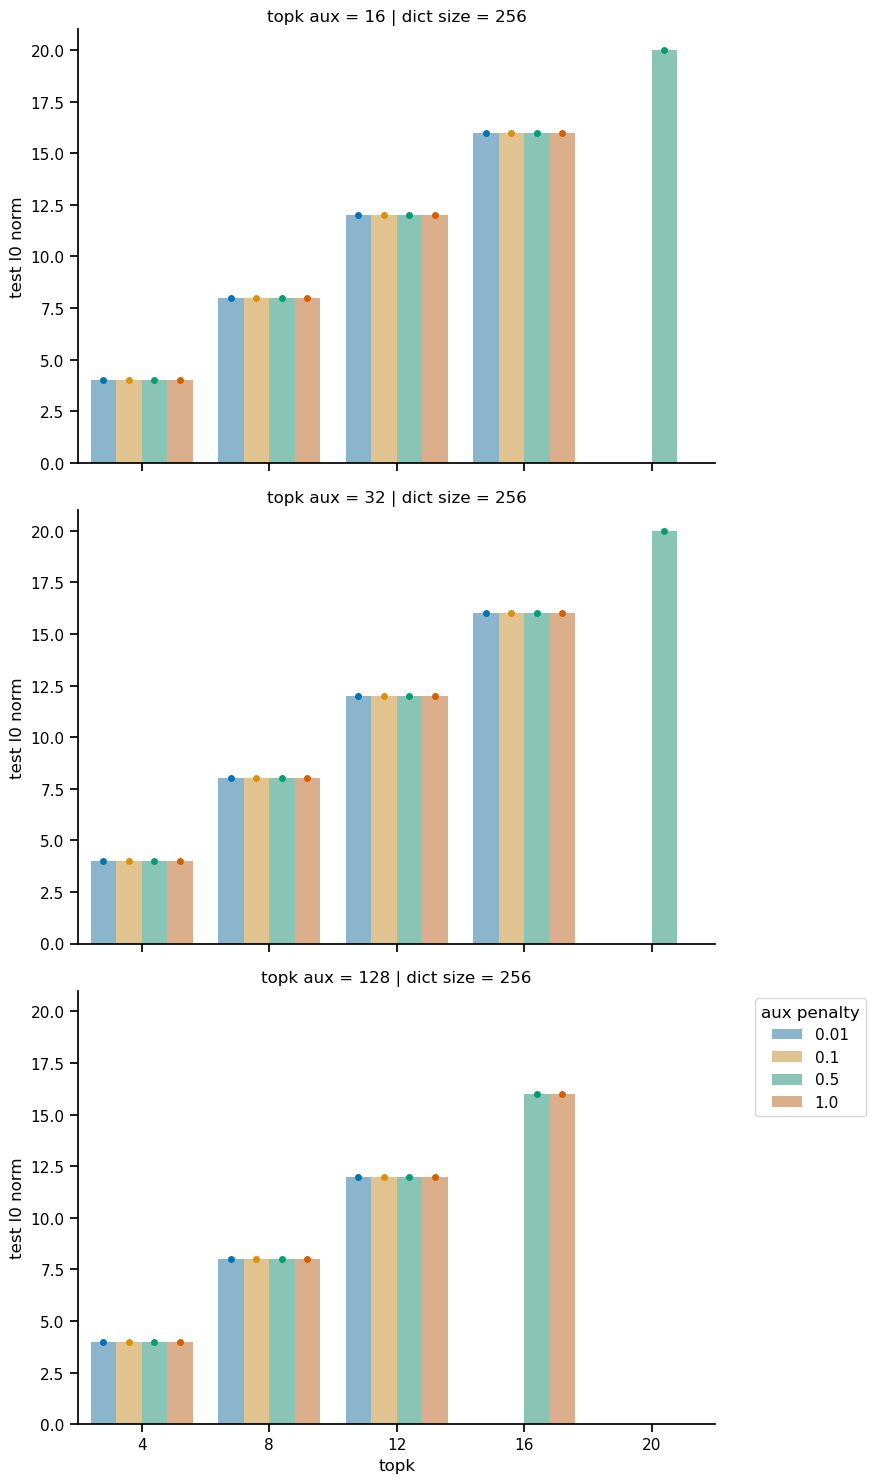

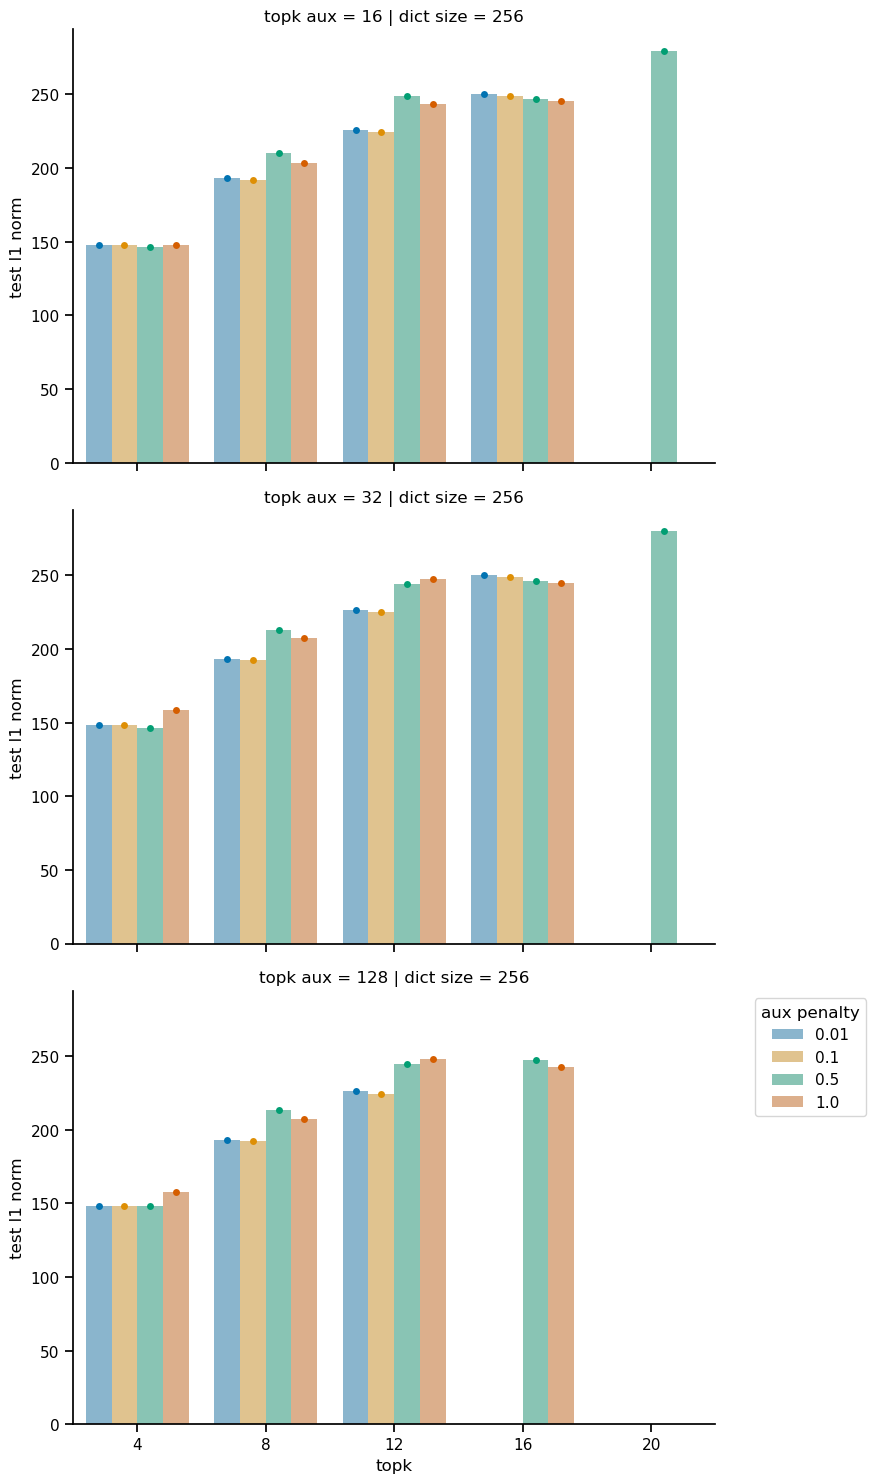

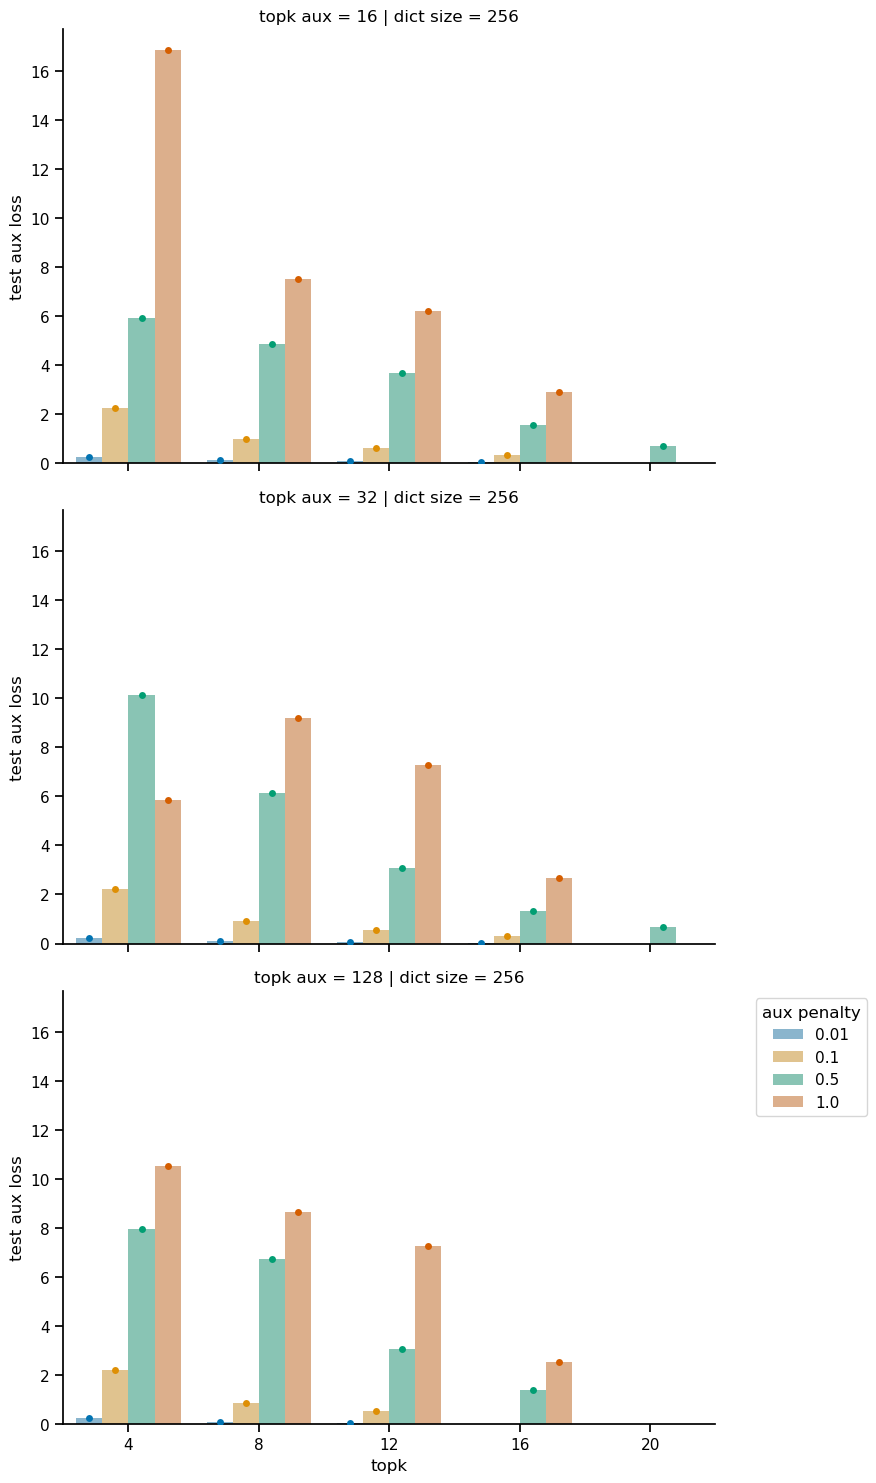

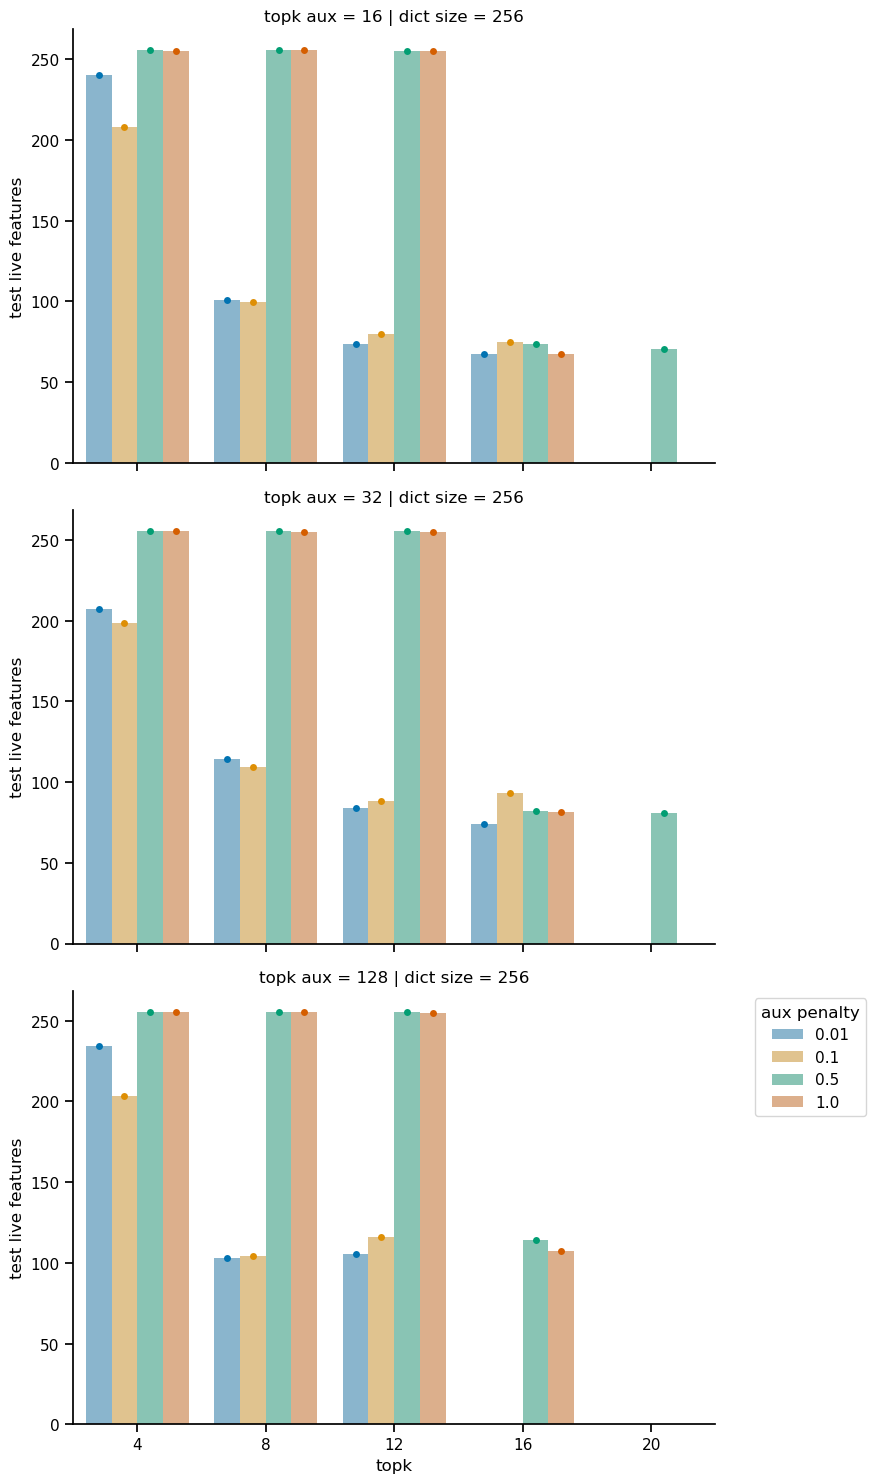

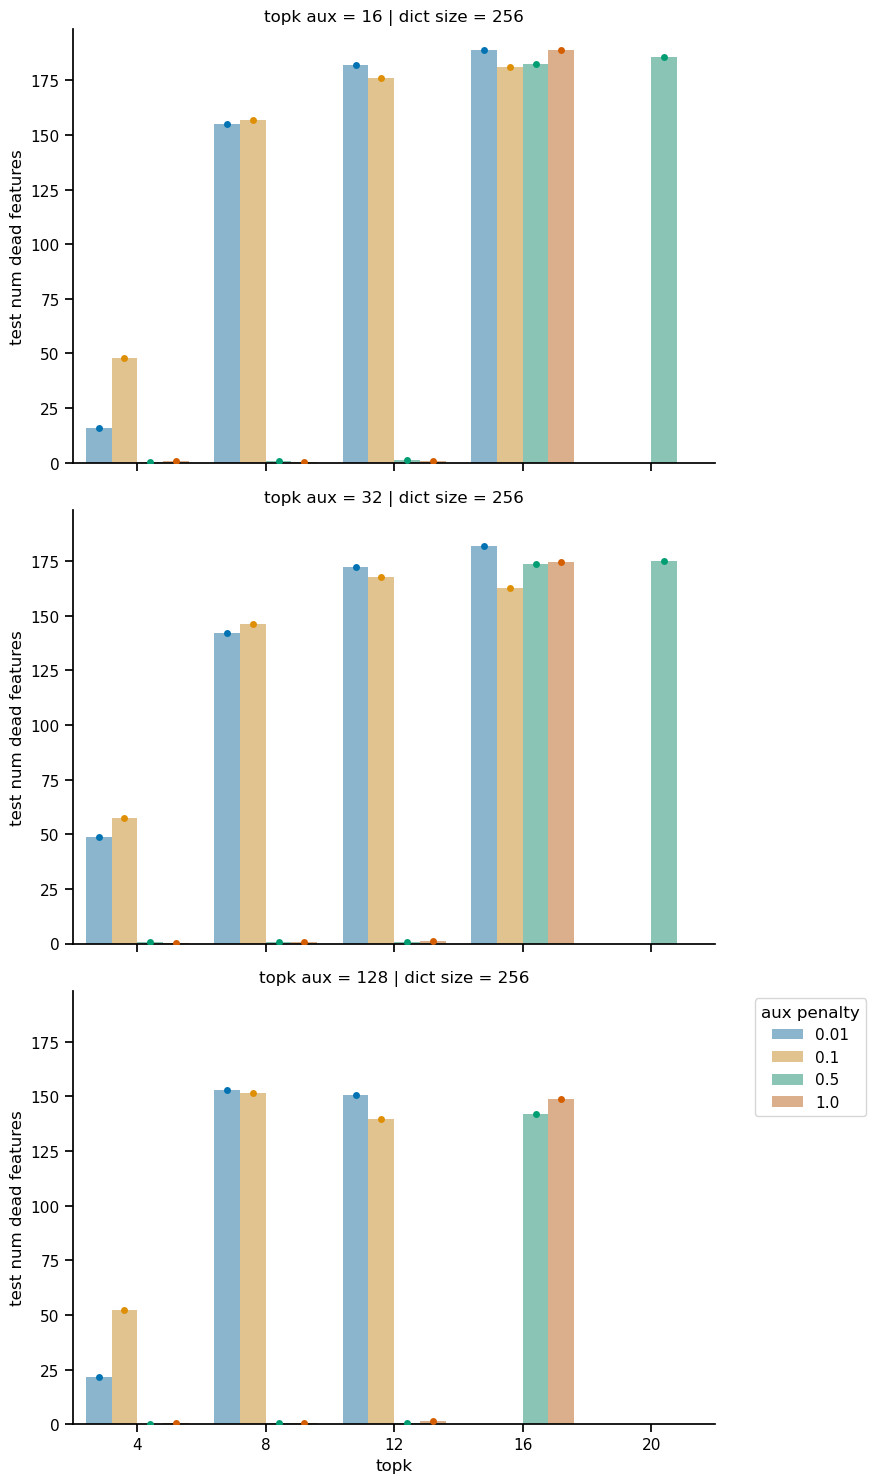

In [13]:
test_cols = ['test loss', 'test l2 loss', 'test l0 norm', 'test l1 norm', 'test aux loss','test live features','test num dead features']

test_plot['aux penalty'] = test_plot['aux penalty'].astype(str)
hue_order = ['0.01', '0.1', '0.5', '1.0']
palette = ['C0','C1','C2','C3']
for col in test_cols:
    g = sns.catplot(data=test_plot, kind='bar',
                    y=col, alpha=0.5,
                    hue='aux penalty',
                    x='topk',
                    col='dict size',
                    row='topk aux',
                    hue_order=hue_order,
                    palette=palette,
                    aspect=1.5, 
                    # col_wrap=3, 
                    legend=True)
    g.legend.remove()
    g.map_dataframe(sns.swarmplot, y=col, 
                    hue='aux penalty',
                    x='topk',
                    hue_order=hue_order,
                    palette=palette,
                    dodge=True,
                    legend=False)
    
    plt.legend(title='aux penalty', bbox_to_anchor=(1.05, 1), loc='upper left')


In [14]:
def simple_to_markdown(table):
    # Get column names from first row of table
    columns = [str(col).strip() for col in table[0]]
    
    # Print header row
    print("| " + " | ".join(columns) + " |")
    
    # Print separator row
    print("| " + " | ".join([''.join(["-"]*len(c)) for c in columns]) + " |")
    
    # Print data rows, starting from second row
    for row in table[1:]:
        values = []
        for val in row:
            # Try to format as scientific notation if numeric
            try:
                val_float = float(val)
                values.append(f'{val_float:.2e}')
            except:
                values.append(str(val).strip())
        print("| " + " | ".join(values) + " |")

In [15]:
import statsmodels.api as sm

# Create OLS model to predict test l2 loss
X = test_plot[['dict size', 'topk', 'topk aux', 'aux penalty']].astype(float)
X = (X-X.mean())/X.std()
y = test_plot['test l2 loss'].astype(float)

# Add constant term
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()


display(model.summary())

for table in model.summary().tables:
    print(simple_to_markdown(table))


MissingDataError: exog contains inf or nans

In [70]:
import statsmodels.api as sm
# Create OLS model to predict test l2 loss
X = test_plot[['dict size', 'topk', 'topk aux', 'aux penalty']].astype(float)
X = (X-X.mean())/X.std()
y = test_plot['test live features'].astype(float)

# Add constant term
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# Print summary
display(model.summary())

for table in model.summary().tables:
    print(simple_to_markdown(table))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     test live features   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     23.39
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           2.55e-10
Time:                        11:27:24   Log-Likelihood:                -176.28
No. Observations:                  48   AIC:                             362.6
Df Residuals:                      43   BIC:                             371.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          80.9610      1.452     55.755      0.000      78.033      83.889
dict size       1.7984      1.467      1.226      0.227      -1.161       4.758
topk           -9.1075      1.467     -6.206      0.000     -12.067      -6.148
topk aux       10.3263      1.467      7.037      0.000       7.367      13.286
aux penalty     2.9451      1.467      2.007      0.051      -0.014       5.904
==============================================================================
Omnibus:                        2.306   Durbin-Watson:                   1.212
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                2.001
Skew:                          -0.383   Prob(JB):                        0.368
Kurtosis:                       2.356   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

| Dep. Variable: | test live features | R-squared: | 0.685 |
| -------------- | ------------------ | ---------- | ----- |
| Model: | OLS | Adj. R-squared: | 0.656 |
| Method: | Least Squares | F-statistic: | 23.39 |
| Date: | Wed, 16 Apr 2025 | Prob (F-statistic): | 2.55e-10 |
| Time: | 11:27:24 | Log-Likelihood: | -176.28 |
| No. Observations: | 48 | AIC: | 362.6 |
| Df Residuals: | 43 | BIC: | 371.9 |
| Df Model: | 4 |  |  |
| Covariance Type: | nonrobust |  |  |
None
|  | coef | std err | t | P>|t| | [0.025 | 0.975] |
|  | ---- | ------- | - | ----- | ------ | ------ |
| const | 80.9610 | 1.452 | 55.755 | 0.000 | 78.033 | 83.889 |
| dict size | 1.7984 | 1.467 | 1.226 | 0.227 | -1.161 | 4.758 |
| topk | -9.1075 | 1.467 | -6.206 | 0.000 | -12.067 | -6.148 |
| topk aux | 10.3263 | 1.467 | 7.037 | 0.000 | 7.367 | 13.286 |
| aux penalty | 2.9451 | 1.467 | 2.007 | 0.051 | -0.014 | 5.904 |
None
| Omnibus: | 2.306 | Durbin-Watson: | 1.212 |
| -------- | ----- | -------------- | ----- |
| Pr

/var/folders/5_/tjkj20xs1zjbm1r6n07ccp4h0000gn/T/ipykernel_38536/391714360.py:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.relplot(data=test_plot,


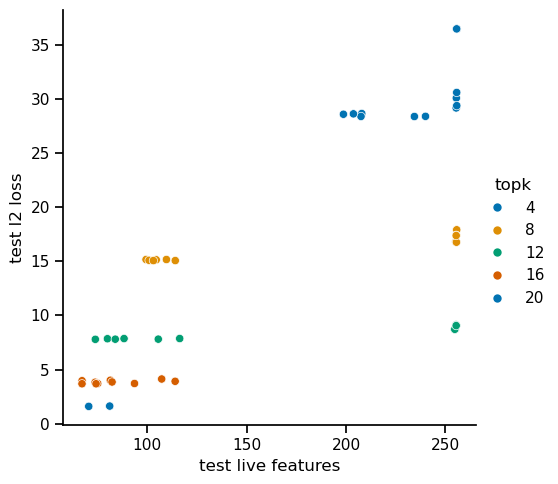

In [16]:
# hue_order = [16, 24]
# palette = ['C0', 'C1']

g = sns.relplot(data=test_plot,
                x='test live features',
                y='test l2 loss',
                # hue='aux penalty',
                hue='topk',
                # hue_order=hue_order,
                palette=palette,
                # col='dict size',
                #     row='topk aux',
                    )



In [24]:
test_plot['test live features'].min()

64.0

/var/folders/5_/tjkj20xs1zjbm1r6n07ccp4h0000gn/T/ipykernel_38536/4241453289.py:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.relplot(data=test_plot,


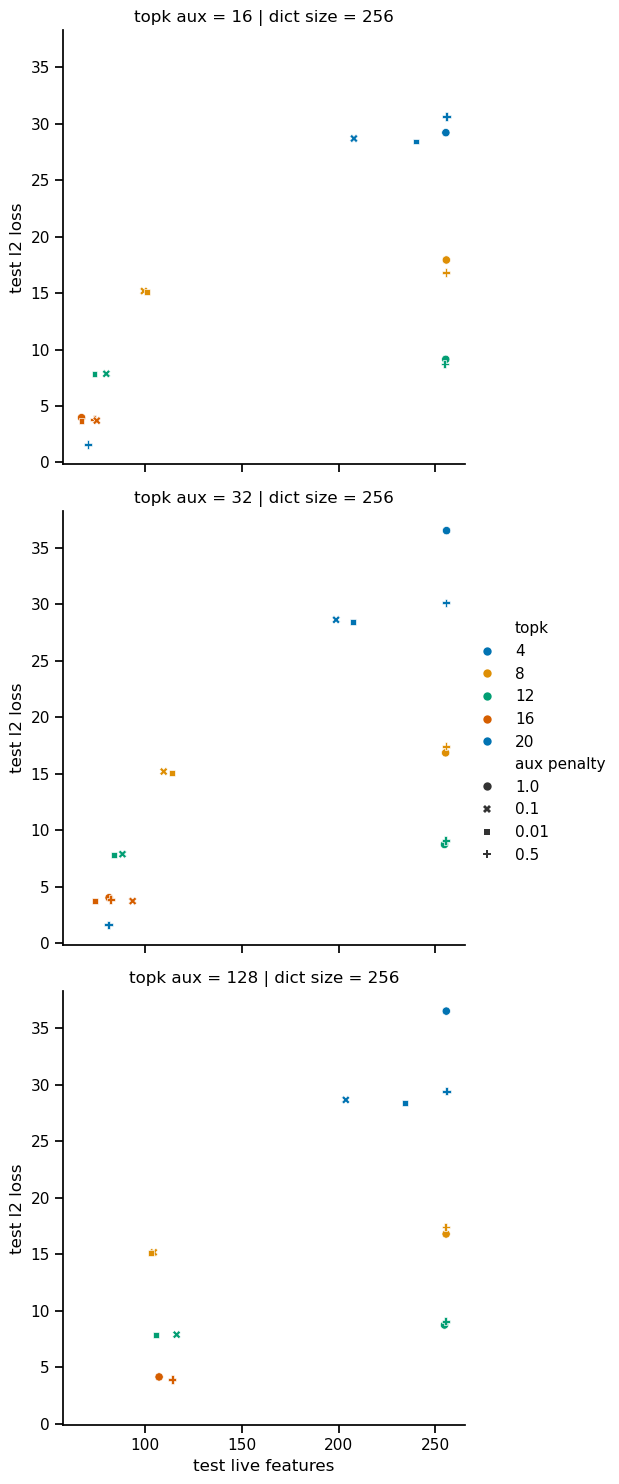

In [18]:
# hue_order = [16, 24]
# palette = ['C0', 'C1']

g = sns.relplot(data=test_plot,
                x='test live features',
                y='test l2 loss',
                style='aux penalty',
                hue='topk',
                # hue_order=hue_order,
                palette=palette,
                col='dict size',
                    row='topk aux',
                    )


/var/folders/5_/tjkj20xs1zjbm1r6n07ccp4h0000gn/T/ipykernel_38536/1009596938.py:1: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.relplot(data=test_plot,


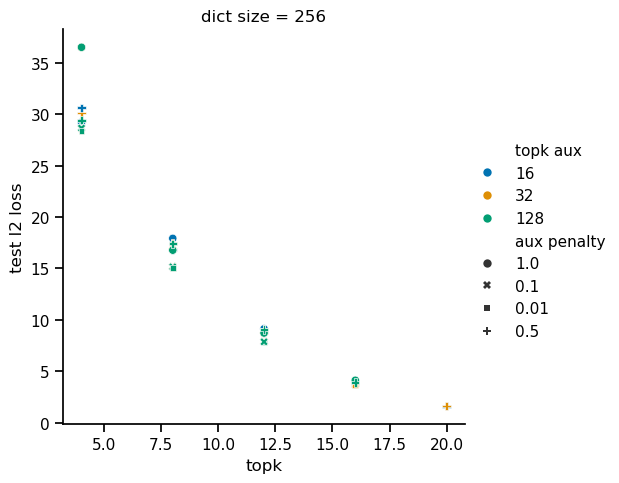

In [20]:
g = sns.relplot(data=test_plot,
                x='topk',
                y='test l2 loss',
                style='aux penalty',
                hue='topk aux',
                # hue_order=hue_order,
                palette=palette,
                col='dict size',
                    # row='',
                    )

/var/folders/5_/tjkj20xs1zjbm1r6n07ccp4h0000gn/T/ipykernel_38536/2557807224.py:1: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.relplot(data=test_plot,


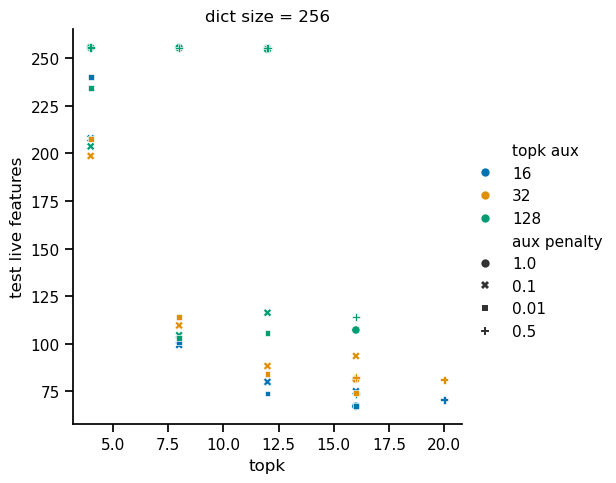

In [21]:
g = sns.relplot(data=test_plot,
                x='topk',
                y='test live features',
                style='aux penalty',
                hue='topk aux',
                # hue_order=hue_order,
                palette=palette,
                col='dict size',
                    # row='',
                    )